In [24]:
# Load needed packages 
import os # Interoperable file paths
import pathlib  # Work with file and directory paths
import matplotlib.pyplot as plt

from glob import glob # Find files by pattern

import earthaccess # For elevation data
import rasterio.merge 
import rioxarray as rxr
import xarray as xr
import xrspatial


In [25]:
# Retrieve location data
%store -r

In [26]:
# Define and create the project data directories
data_dir = os.path.join(
    pathlib.Path.home(),
    'GitHub',
    'rivercane_data'
)

os.makedirs(data_dir, exist_ok=True)

<Axes: >

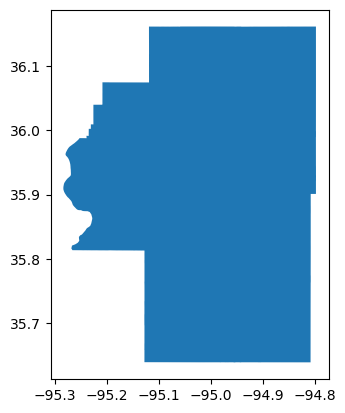

In [27]:
# Verify Oklahoma County shape
cherokee_county.plot()

In [28]:
# Use earthaccess website to access elevation data
earthaccess.login()

In [29]:
# Find the dataset that is the best fit for elevation and compatible with other 30m data 
datasets = earthaccess.search_datasets(keyword='SRTM DEM', count=11)
for dataset in datasets:
  print(dataset['umm']['ShortName'], dataset['umm']['EntryTitle'])


NASADEM_SHHP NASADEM SRTM-only Height and Height Precision Mosaic Global 1 arc second V001
NASADEM_SIM NASADEM SRTM Image Mosaic Global 1 arc second V001
NASADEM_SSP NASADEM SRTM Subswath Global 1 arc second V001
C_Pools_Fluxes_CONUS_1837 CMS: Terrestrial Carbon Stocks, Emissions, and Fluxes for Conterminous US, 2001-2016
SRTMGL1 NASA Shuttle Radar Topography Mission Global 1 arc second V003
GEDI01_B GEDI L1B Geolocated Waveform Data Global Footprint Level V002
GEDI02_B GEDI L2B Canopy Cover and Vertical Profile Metrics Data Global Footprint Level V002
NASADEM_HGT NASADEM Merged DEM Global 1 arc second V001
SRTMGL3 NASA Shuttle Radar Topography Mission Global 3 arc second V003
SRTMGL1_NC NASA Shuttle Radar Topography Mission Global 1 arc second NetCDF V003
SRTMGL30 NASA Shuttle Radar Topography Mission Global 30 arc second V002


In [7]:
# Download the elevation data for Oklahoma county
ok_srtm_pattern = os.path.join(data_dir, '*.hgt.zip')
bounds = tuple(cherokee_county.total_bounds)
if not glob(ok_srtm_pattern):
    ok_srtm_results = earthaccess.search_data(
        short_name="SRTMGL1", 
        bounding_box=bounds
    )
    ok_srtm_results = earthaccess.download(ok_srtm_results, data_dir)

(array([252785., 502092., 757932., 880758., 568001., 284916.,  34048.,
         15144.,   4570.,   2140.]),
 array([142.        , 177.8999939 , 213.80000305, 249.70001221,
        285.6000061 , 321.5       , 357.40002441, 393.30001831,
        429.20001221, 465.1000061 , 501.        ]),
 <BarContainer object of 10 artists>)

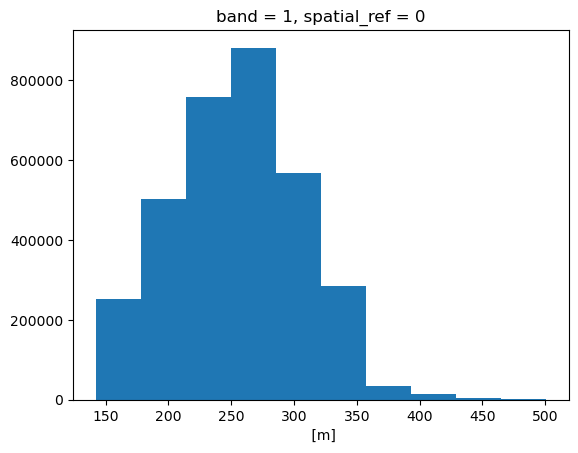

In [8]:
# Extract Oklahoma data and combine into one datafile
ok_srtm_da_list = []
for ok_srtm_path in glob(ok_srtm_pattern):
    ok_tile_da = rxr.open_rasterio(ok_srtm_path, mask_and_scale=True).squeeze()
    ok_cropped_da = ok_tile_da.rio.clip_box(*bounds)
    ok_srtm_da_list.append(ok_cropped_da)

ok_srtm_da = xr.concat(ok_srtm_da_list, dim='dim_0')
ok_srtm_da.plot()

<Axes: >

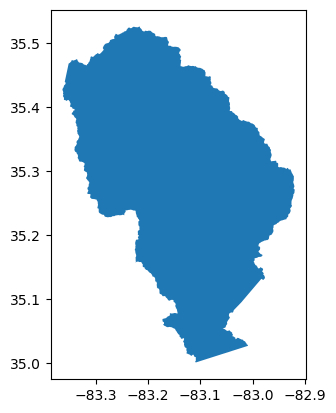

In [9]:
# Verify North Carolina county
jackson_county.plot()

In [10]:
# Define different data directory for NC
nc_data_dir = os.path.join(
    pathlib.Path.home(),
    'GitHub',
    'habitat_project'
)

os.makedirs(nc_data_dir, exist_ok=True)

In [11]:
# Download the elevation data for North Carolina county
nc_srtm_pattern = os.path.join(nc_data_dir, '*.hgt.zip')
bounds = tuple(jackson_county.total_bounds)
if not glob(nc_srtm_pattern):
    nc_srtm_results = earthaccess.search_data(
    short_name="SRTMGL1", 
    bounding_box=bounds
    )
    nc_srtm_results = earthaccess.download(nc_srtm_results, nc_data_dir)

(array([ 28354., 160103., 473502., 672292., 724161., 597672., 221481.,
        102190.,  44927.,   4988.]),
 array([ 333.        ,  495.20001221,  657.40002441,  819.59997559,
         981.79998779, 1144.        , 1306.19995117, 1468.40002441,
        1630.59997559, 1792.79992676, 1955.        ]),
 <BarContainer object of 10 artists>)

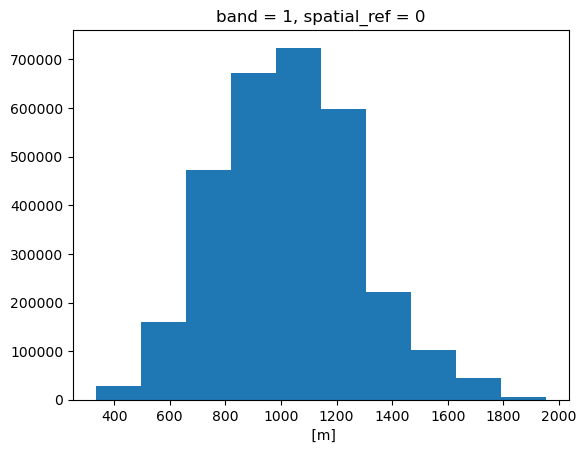

In [13]:
# Extract North Carolina data and combine into one datafile
nc_srtm_da_list = []
for nc_srtm_path in glob(nc_srtm_pattern):
    nc_tile_da = rxr.open_rasterio(nc_srtm_path, mask_and_scale=True).squeeze()
    nc_cropped_da = nc_tile_da.rio.clip_box(*bounds)
    nc_srtm_da_list.append(nc_cropped_da)

nc_srtm_da = xr.concat(nc_srtm_da_list, dim='dim_0')
nc_srtm_da.plot()

### At this point my elevation data arrays have three dimensions - Oklahoma data is the merging of four channels size = (4, 1885, 1750) and North Carolina has two channels size = (2, 1890, 1602). To visualize a slope map, I would need to create a digital elevation model (DEM) and then calculate the slope using GIS software. If time permits, I'll give it a go.